## Setup

* Load libraries
* Import the four before/after files
* Check length 

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import time
import networkx as nx

#### Import TinyBert Files

In [ ]:
#Load feather files 
file_path = 'after_policy_change.feather'
# Read Feather file into DataFrame
after_policy_change_imbal = pd.read_feather(file_path)

In [ ]:
# Matching imbal and bal length 
len(after_policy_change_imbal)

In [ ]:
unique_after_imbalsr =after_policy_change_imbal['subreddit'].nunique()
unique_after_imbalsr

In [ ]:
unique_after_imbalid =after_policy_change_imbal['subreddit_id'].nunique()
unique_after_imbalid

In [ ]:
is_one_to_one = (after_policy_change_imbal.groupby('subreddit_id')['subreddit'].nunique() == 1).all()
is_one_to_one

In [ ]:
#Load feather files 
file_path = 'after_policy_change_bal.feather'
# Read Feather file into DataFrame
after_policy_change_bal = pd.read_feather(file_path)

In [ ]:
len(after_policy_change_bal)

In [ ]:
unique_after_balsr =after_policy_change_bal['subreddit'].nunique()
unique_after_balsr

In [ ]:
#Load feather files 
file_path = 'before_policy_change.feather'
# Read Feather file into DataFrame
before_policy_change_imbal = pd.read_feather(file_path)

In [ ]:
len(before_policy_change_imbal)

In [ ]:
unique_count =before_policy_change_imbal['subreddit'].nunique()
print(unique_count)

In [ ]:
#Load feather files 
file_path = 'before_policy_change_bal.feather'
# Read Feather file into DataFrame
before_policy_change_bal = pd.read_feather(file_path)

In [ ]:
len(before_policy_change_bal)

In [ ]:
unique_count =before_policy_change_bal['subreddit'].nunique()
unique_count

In [ ]:
unique_countid =before_policy_change_bal['subreddit_id'].nunique()
unique_countid

In [ ]:
unique_countid =before_policy_change_bal['parent_id'].nunique()
unique_countid

In [ ]:
before_policy_change_bal.head(2)

#### Merge tinyBERT imbal and bal before and after 

In [ ]:
# Rename the 'predicted_label' column in df_bal.
df_bal = before_policy_change_bal.rename(columns={'predicted_label': 'bal_predicted'})
df_bal

In [ ]:
# Rename the 'predicted_label' column in df_imbal.
# Note same number of rows and indexes are the same
df_imbal = before_policy_change_imbal.rename(columns={'predicted_label': 'imbal_predicted'})
df_imbal

In [ ]:
# Join datasets
before_combined_all = df_bal.join(df_imbal, lsuffix='_bal', rsuffix='_imbal')
before_combined_all.head(1)

In [ ]:
# Drop and reorder remaining columns for easier comparision
# Note same number of rows 
before_combined_all = before_combined_all.drop(['parent_id_imbal', 'score_imbal', 'subreddit_imbal','body_imbal', 'subreddit_type_imbal','created_utc_imbal'], axis=1)
before_all_col = ['body_bal','imbal_predicted','bal_predicted','subreddit_bal','subreddit_id_bal',
'subreddit_id_imbal','created_utc_bal','score_bal','subreddit_type_bal']
before_combined_all=before_combined_all[before_all_col]
before_combined_all

In [ ]:
# Save to csv
before_combined_all.to_csv('bef_bal_imbal_all.csv', index=False)

In [ ]:
# Filter for only rows where bal and imbal predicted are not equal
before_filtered = before_combined_all[before_combined_all['imbal_predicted'] != before_combined_all['bal_predicted']]
#before_filtered

In [ ]:
# Save to csv
before_filtered.to_csv('bef_bal_imbal_mismatch.csv', index=False)

In [ ]:
# Rename the 'predicted_label' column in df_bal.
df_bal_after = after_policy_change_bal.rename(columns={'predicted_label': 'bal_predicted'})
df_bal_after.head(2)

In [ ]:
# Rename the 'predicted_label' column in df_imbal.
# Note same number of rows and indexes are the same
df_imbal_after = after_policy_change_imbal.rename(columns={'predicted_label': 'imbal_predicted'})
df_imbal_after.head(2)

In [ ]:
# Join datasets
after_combined_all = df_bal_after.join(df_imbal_after, lsuffix='_bal', rsuffix='_imbal')
after_combined_all.head(1)

In [ ]:
# Drop and reorder remaining columns for easier comparision
# Note same number of rows 
after_combined_all = after_combined_all.drop(['parent_id_imbal', 'score_imbal', 'subreddit_imbal','body_imbal', 'subreddit_type_imbal','created_utc_imbal'], axis=1)
after_all_col = ['body_bal','imbal_predicted','bal_predicted','subreddit_bal','subreddit_id_bal',
'subreddit_id_imbal','created_utc_bal','score_bal','subreddit_type_bal']
after_combined_all=after_combined_all[after_all_col]
after_combined_all.head(2)

In [ ]:
# Save to csv
after_combined_all.to_csv('aft_bal_imbal_all.csv', index=False)

#### Load T. Lever's Before Results


In [ ]:
# Prior 6-26 to 6-27 
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-06-26_To_2020-06-27.csv'
before_policy_change_part1 = pd.read_csv(file_path)

In [ ]:
#before_policy_change_part1

In [ ]:
# Check the number of unique 'text' values 
unique_text_count = before_policy_change_part1['text'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Dropping duplicate rows based on the 'text' column and keeping the first occurrence
before_policy_change_part1 = before_policy_change_part1.drop_duplicates(subset='text', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(before_policy_change_part1.shape[0])

In [ ]:
#before_policy_change_part1

In [ ]:
# 6-27 to 6-28 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-06-27_To_2020-06-28.csv'
before_policy_change_part2 = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'text' values
unique_text_count2 = before_policy_change_part2['text'].nunique()
print(f"Unique text: {unique_text_count2}")

In [ ]:
# Dropping duplicate rows based on the 'text' column and keep the first occurrence
before_policy_change_part2 = before_policy_change_part2.drop_duplicates(subset='text', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(before_policy_change_part2.shape[0])

In [ ]:
# 6-28 to 6-29 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-06-28_To_2020-06-29.csv'
before_policy_change_part3 = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'body_bal' values in 't_lever_before'
unique_text_count3 = before_policy_change_part3['text'].nunique()
print(f"Unique text: {unique_text_count3}")

In [ ]:
#before_policy_change_part3 

In [ ]:
# Concatenate three dataframes
all_parts = pd.concat([before_policy_change_part1, before_policy_change_part2, before_policy_change_part3], ignore_index=True)

In [ ]:
# Save to csv
all_parts.to_csv('t_lever_before.csv', index=False)

In [ ]:
len(all_parts)

In [ ]:
all_parts.head(2)

#### Load H.Koizumi's Before Results


In [ ]:
# Prior 6-26 to 6-27 
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-06-26_To_2020-06-27.csv'
before_policy_change_part1DB = pd.read_csv(file_path)

In [ ]:
#before_policy_change_part1DB

In [ ]:
# Check the number of unique 'body' values 
unique_text_count = before_policy_change_part1DB['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Dropping duplicate rows based on the 'body_bal' column and keep first occurrence
before_policy_change_part1DB = before_policy_change_part1DB.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(before_policy_change_part1DB.shape[0])

In [ ]:
#before_policy_change_part1DB

In [ ]:
# 6-27 to 6-28 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-06-27_To_2020-06-28.csv'
before_policy_change_part2DB = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'body'
unique_text_count2 = before_policy_change_part2DB['body'].nunique()
print(f"Unique text: {unique_text_count2}")

In [ ]:
# Dropping duplicate rows based on the 'body' column 
before_policy_change_part2DB = before_policy_change_part2DB.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(before_policy_change_part2DB.shape[0])

In [ ]:
# 6-28 to 6-29 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-06-28_To_2020-06-29.csv'
before_policy_change_part3DB = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'body'
unique_text_count3DB = before_policy_change_part3DB['body'].nunique()
print(f"Unique text: {unique_text_count3DB}")

In [ ]:
# Dropping duplicate rows based on the 'body' column 
before_policy_change_part3DB = before_policy_change_part3DB.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(before_policy_change_part3DB.shape[0])

In [ ]:
#before_policy_change_part3DB 

In [ ]:
# Concatenate three dataframes
all_partsDB = pd.concat([before_policy_change_part1DB, before_policy_change_part2DB, before_policy_change_part3DB], ignore_index=True)

In [ ]:
# Save to csv
all_partsDB.to_csv('h_koizumi_before.csv', index=False)

In [ ]:
len(all_partsDB)

In [ ]:
all_partsDB.head(2)

#### Load tinyBERT 

In [ ]:
# Load before tinyBert balanced and imbalanced results
file_path = 'bef_bal_imbal_all.csv'
bef_bal_imbal_all = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'body_bal' values 
unique_bef = bef_bal_imbal_all['body_bal'].nunique()
print(f"Unique text: {unique_bef}")

In [ ]:
# Dropping duplicate rows based on the 'body_bal' column and keep first
bef_bal_imbal_all = bef_bal_imbal_all.drop_duplicates(subset='body_bal', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(bef_bal_imbal_all.shape[0])

In [ ]:
len(bef_bal_imbal_all)

In [ ]:
#bef_bal_imbal_all

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['subreddit_id_imbal', 'subreddit_id_bal','score_bal','subreddit_type_bal']
bef_bal_imbal_min = bef_bal_imbal_all.drop(columns=columns_to_drop)

In [ ]:
# Save to csv
bef_bal_imbal_min.to_csv('bef_bal_imbal_min.csv', index=False)

In [ ]:
# bef_bal_imbal_min

In [ ]:
# Load before tinyBert balanced and imbalanced results
file_path = 'aft_bal_imbal_all.csv'
aft_bal_imbal_all = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'body_bal' values 
unique_aft = aft_bal_imbal_all['body_bal'].nunique()
print(f"Unique text: {unique_aft}")

In [ ]:
# Dropping duplicate rows based on the 'body_bal' column and keep first
aft_bal_imbal_all = aft_bal_imbal_all.drop_duplicates(subset='body_bal', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(aft_bal_imbal_all.shape[0])

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['subreddit_id_imbal', 'subreddit_id_bal','score_bal','subreddit_type_bal']
aft_bal_imbal_min = aft_bal_imbal_all.drop(columns=columns_to_drop)

In [ ]:
# Save to csv
aft_bal_imbal_min.to_csv('aft_bal_imbal_min.csv', index=False)

#### Random Sample and Merge Before Test Predictions

* Due to issues with merging these large files - decided to first do a random sample of TinyBERT
* Merge T.Lever on tinyBERT random sample
* Merge H.Koizumi on same random sample

In [ ]:
# Load tinyBERT
file_path = 'bef_bal_imbal_min.csv'
bef_bal_imbal_min = pd.read_csv(file_path)

In [ ]:
# Rename column to body for everything merge on body
bef_bal_imbal_min.rename(columns={'body_bal':'body'}, inplace = True)
bef_bal_imbal_min.head(2)

In [ ]:
# Load T Lever before
file_path = 't_lever_before.csv'
t_lever_before = pd.read_csv(file_path)

In [ ]:
# Load H. Koizumi before
file_path = 'h_koizumi_before.csv'
h_koizumi_before = pd.read_csv(file_path)

In [ ]:
# Rename text to body
t_lever_before.rename(columns={'text':'body'}, inplace = True)
t_lever_before.head(2)

#### Take Sample

In [ ]:
# Take sample from tinyBert Predictions
before_sample_250 = bef_bal_imbal_min.sample(n=250, random_state = 44)
len(before_sample_250)

In [ ]:
# Sample additional 250 entries from the remaining DataFrame
remaining = bef_bal_imbal_min.drop(before_sample_250.index)  # Drop already sampled entries
additional_sample_250 = remaining.sample(n=250, random_state=44)  # Sample more from the remaining data

# Combine both samples to form a 500 sample set
sample_500 = pd.concat([before_sample_250, additional_sample_250])

In [ ]:
# Check the number of unique 'body' values 
unique_text_count = sample_500['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Save to csv
sample_500.to_csv('before_sample_500.csv', index=False)

In [ ]:
# Merge T.Lever into sample
matched_df = sample_500.merge(t_lever_before, on='body', how='left', indicator=True)
print(matched_df['_merge'].value_counts())

In [ ]:
matched_df.head(2)

In [ ]:
# Merge H.Koizumi into sample, specifying a unique name for the indicator column
matched_df = matched_df.merge(h_koizumi_before, on='body', how='left', indicator='merge_indicator')
print(matched_df['merge_indicator'].value_counts())

In [ ]:
matched_df.head(2)

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['subreddit_bal', 'created_utc_bal']
matched_df = matched_df.drop(columns=columns_to_drop)
matched_df.head(2)

In [ ]:
# Rename columns for clarity
# Reorder columns for ease of analysis
matched_df = matched_df.rename(columns={'imbal_predicted':'tinyB_imbal_pred', 'bal_predicted':'tinyB_bal_pred', 
                                        'prediction': 'BERT_pred', '_merge': 'merge_tl', 'predicted_label': 'distilB_pred', 
                                        'merge_indicator': 'merge_hk'})

new_order = ['body', 'tinyB_imbal_pred','tinyB_bal_pred', 'BERT_pred','distilB_pred', 'subreddit','subreddit_id','created_utc','parent_id', 'subreddit_type','merge_tl', 'merge_hk']
matched_df = matched_df[new_order]

In [ ]:
matched_df.head(2)

In [ ]:
# Check the number of unique 'body' 
unique_text_count = matched_df['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Dropping duplicate rows based on the 'body' column and keep first occurrence
matched_df= matched_df.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(matched_df.shape[0])

In [ ]:
matched_df = matched_df.reset_index(drop=True)
len(matched_df)

In [ ]:
# Save to csv
matched_df.to_csv('before_sample_one_500.csv', index=False)

#### Random Sample and Merge AFTER Predictions

* Due to issues with merging these large files - decided to first do a random sample of TinyBERT
* Merge T.Lever on tinyBERT random sample
* Merge H.Koizumi on same random sample

#### T Lever After 

In [ ]:
# T Lever 
# Prior 6-26 to 6-27 
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-06-29_To_2020-06-30.csv'
after_policy_change_part1 = pd.read_csv(file_path)
# 6-27 to 6-28 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-06-30_To_2020-07-01.csv'
after_policy_change_part2 = pd.read_csv(file_path)
# 6-28 to 6-29 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_BBHSBC_For_2020-07-01_To_2020-07-02.csv'
after_policy_change_part3 = pd.read_csv(file_path)

In [ ]:
# Concatenate three dataframes
all_parts_after = pd.concat([after_policy_change_part1, after_policy_change_part2, after_policy_change_part3], ignore_index=True)

In [ ]:
#all_parts_after

In [ ]:
# Check the number of unique 'text' values 
unique_text_count = all_parts_after['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
all_parts_after = all_parts_after.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(all_parts_after.shape[0])

In [ ]:
all_parts_after.head()

In [ ]:
# Save to csv
all_parts_after.to_csv('t_lever_after.csv', index=False)

#### H. Koizumi After 

In [ ]:
# H Koizumi 
# Prior 6-26 to 6-27 
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-06-29_To_2020-06-30.csv'
after_policy_change_part1DB = pd.read_csv(file_path)
# 6-27 to 6-28 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-06-30_To_2020-07-01.csv'
after_policy_change_part2DB = pd.read_csv(file_path)
# 6-28 to 6-29 Prior
file_path = 'Data_Frame_Of_Texts_And_Predictions_By_DBHSBC_For_2020-07-01_To_2020-07-02.csv'
after_policy_change_part3DB = pd.read_csv(file_path)

In [ ]:
# Concatenate three dataframes
all_parts_afterDB = pd.concat([after_policy_change_part1DB, after_policy_change_part2DB, after_policy_change_part3DB], ignore_index=True)

In [ ]:
# Check the number of unique 'text' values 
unique_text_count = all_parts_afterDB['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
all_parts_afterDB = all_parts_afterDB.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates have been removed
print(all_parts_afterDB.shape[0])

In [ ]:
all_parts_afterDB.head()

In [ ]:
# Save to csv
all_parts_afterDB.to_csv('h_koizumi_after.csv', index=False)

#### Take Sample 500 

In [ ]:
# Take sample from tinyBert Predictions
after_sample_500 = aft_bal_imbal_min.sample(n=500, random_state = 44)
len(after_sample_500)

In [ ]:
# Save to csv
after_sample_500.to_csv('after_sample_500.csv', index=False)

In [ ]:
after_sample_500.head(2)

In [ ]:
# Rename text to body
after_sample_500.rename(columns={'body_bal':'body'}, inplace = True)
after_sample_500.head(2)

In [ ]:
# Rename column to body for everything merge on body
aft_bal_imbal_min.rename(columns={'body_bal':'body'}, inplace = True)
aft_bal_imbal_min.head(2)

In [ ]:
# Load T Lever after
file_path = 't_lever_after.csv'
t_lever_after = pd.read_csv(file_path)

In [ ]:
# Load H. Koizumi before
file_path = 'h_koizumi_after.csv'
h_koizumi_after = pd.read_csv(file_path)

In [ ]:
# Merge T.Lever into sample
after_matched_df = after_sample_500.merge(t_lever_after, on='body', how='left', indicator=True)
print(after_matched_df['_merge'].value_counts())

In [ ]:
# Merge H.Koizumi into sample, specifying a unique name for the indicator column
after_matched_df = after_matched_df.merge(h_koizumi_after, on='body', how='left', indicator='merge_indicator')
print(after_matched_df['merge_indicator'].value_counts())

In [ ]:
#after_matched_df.head(2)

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['subreddit_bal', 'created_utc_bal']
after_matched_df = after_matched_df.drop(columns=columns_to_drop)
#after_matched_df.head(2)

In [ ]:
# Rename columns for clarity
# Reorder columns for ease of analysis
after_matched_df = after_matched_df.rename(columns={'imbal_predicted':'tinyB_imbal_pred', 'bal_predicted':'tinyB_bal_pred', 
                                        'predicted_label_x': 'BERT_pred', '_merge': 'merge_tl', 'predicted_label_y': 'distilB_pred', 
                                        'merge_indicator': 'merge_hk'})
#after_matched_df.head(2)

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['parent_id_x', 'score_x', 'subreddit_x', 'subreddit_id_x', 'subreddit_type_x','created_utc_x']
after_matched_df = after_matched_df.drop(columns=columns_to_drop)
#after_matched_df.head(2)

In [ ]:
# Rename more columns for clarity
after_matched_df = after_matched_df.rename(columns={'parent_id_y': 'parent_id', 'score_y':'score', 'subreddit_y':'subreddit', 'subreddit_id_y': 'subreddit_id', 'subreddit_type_y': 'subreddit_type',
                                                   'created_utc_y': 'created_utc'})
#after_matched_df.head(2)

In [ ]:
new_order = ['body', 'tinyB_imbal_pred','tinyB_bal_pred', 'BERT_pred','distilB_pred', 'subreddit','subreddit_id','created_utc','parent_id', 'subreddit_type','merge_tl', 'merge_hk']
after_matched_df = after_matched_df[new_order]

In [ ]:
#after_matched_df.head(2)

In [ ]:
# Check the number of unique 'body' 
unique_text_count = after_matched_df['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
after_matched_df = after_matched_df.reset_index(drop=True)
len(after_matched_df)

In [ ]:
# Save to csv
after_matched_df.to_csv('after_sample_one_500.csv', index=False)

## EDA 

### Histogram - Compare 4 Models Before Policy Change Predictions

#### Import and Set Up Data

In [ ]:
# Load before tinyBert balanced results
file_path = 'before_policy_change.feather'
before_policy_change_imbal = pd.read_feather(file_path)

In [ ]:
# Drop duplicate rows based on the 'body' column and keep first occurrence
before_policy_change_imbal = before_policy_change_imbal.drop_duplicates(subset='body', 
                                                                        keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(before_policy_change_imbal.shape[0])

In [ ]:
# Load before tinyBert imbalanced results
file_path = 'before_policy_change_bal.feather'
before_policy_change_bal = pd.read_feather(file_path)

In [ ]:
# Drop duplicate rows based on the 'body' column and keep first occurrence
before_policy_change_bal = before_policy_change_bal.drop_duplicates(subset='body', 
                                                                        keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(before_policy_change_bal.shape[0])

In [ ]:
# Load t lever before results
file_path = 't_lever_before.csv'
t_lever_before = pd.read_csv(file_path)

In [ ]:
#t_lever_before

In [ ]:
t_lever_before = t_lever_before.reset_index(drop=True)
len(t_lever_before)

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
t_lever_before = t_lever_before.drop_duplicates(subset='text', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(t_lever_before.shape[0])

In [ ]:
# Load h koizumi before results
file_path = 'h_koizumi_before.csv'
h_koizumi_before = pd.read_csv(file_path)

In [ ]:
#h_koizumi_before

In [ ]:
h_koizumi_before = h_koizumi_before.reset_index(drop=True)
len(h_koizumi_before)

In [ ]:
# Check the number of unique 'text' values 
unique_text_count = h_koizumi_before['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
h_koizumi_before = h_koizumi_before.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(h_koizumi_before.shape[0])

In [ ]:
t_lever_before.head(1)

In [ ]:
# If you want to keep all entries from both DataFrames and not just the intersection, use 'outer' instead of 'inner'
merged_df_outer = t_lever_before.merge(h_koizumi_before, left_on='text', right_on='body', how='outer')

In [ ]:
merged_df_outer.head(2)

In [ ]:
t_lever_before = merged_df_outer

In [ ]:
# Drop more columns - mostly irrelevant
columns_to_drop = ['text', 'predicted_label']
t_lever_before= t_lever_before.drop(columns=columns_to_drop)
t_lever_before.head(2)

In [ ]:
# Rename column to body for everything merge on body
t_lever_before.rename(columns={'prediction':'predicted_label'}, inplace = True)
# Round the predicted_label values to the nearest integer (0 or 1)
t_lever_before['predicted_label'] = t_lever_before['predicted_label'].round().astype(int)
t_lever_before.head(1)

In [ ]:
h_koizumi_before.head(1)

#### Histogram Before 

In [ ]:
# Data for imbalanced and balanced before policy change
predictions_hist_before_tBimbal = before_policy_change_imbal['predicted_label'].tolist()
predictions_hist_before_dB = h_koizumi_before['predicted_label'].tolist()
predictions_hist_before_BB = t_lever_before['predicted_label'].tolist()
predictions_hist_before_tBbal = before_policy_change_bal['predicted_label'].tolist()

# Concatenate DataFrames 
hist_all_before = pd.concat([
    before_policy_change_imbal.assign(Type='Hate Speech Imbalanced Data\nModel: tinyBERT'),    
    before_policy_change_bal.assign(Type='Hate Speech Balanced Data\nModel: tinyBERT'),
    h_koizumi_before.assign(Type='Ethos Data\nModel: distilBERT'),    
    t_lever_before.assign(Type='Hate Speech Imbalanced Data\nModel: BERT'),    
])

# Save to csv
hist_all_before.to_csv('hist_all_before.csv', index=False)

# Start clock 
start_time = time.time()

# Plot data
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=hist_all_before_sorted, x='predicted_label', hue='Type', multiple='dodge',
                  palette=['#ae76a3','#882e72','#4eb265','#5289c7'], edgecolor='#222255', 
                  binrange=(0, 1), bins=2, kde=False)

# Define new tick positions and labels to change 0 and 1 to actual terms
ticks = [0.25, 0.75]  
labels = ['Not Labeled Hate as Speech', 'Labeled Hate as Speech']

# Set x-axis ticks and labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Loop over the bars (patches) and add a text annotation with the height of each bar
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2, y=p.get_height(), s=int(p.get_height()), 
            ha='center', va='bottom', fontsize=12)

 # Add labels and title
plt.yticks(fontsize=18) 
plt.xticks(fontsize=18) 
# Save and show plot
plt.xlabel('Class', fontsize=20)
plt.ylabel('Frequency (1e7)',fontsize =20)
plt.title('Comparison of Predicted Classes Before Policy Change', fontsize = 20)   
 
# End clock and print time taken
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Save and show plot
plt.savefig('before_compare_hist.png')
plt.show()

### Histogram - Compare 4 Models After Policy Change Predictions

#### Import and Set up 

In [ ]:
# Load after tinyBert balanced results
file_path = 'after_policy_change.feather'
after_policy_change_imbal = pd.read_feather(file_path)

In [ ]:
# Drop duplicate rows based on the 'body' column and keep first occurrence
after_policy_change_imbal = after_policy_change_imbal.drop_duplicates(subset='body', 
                                                                      keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(after_policy_change_imbal.shape[0])

In [ ]:
# Load before tinyBert imbalanced results
file_path = 'after_policy_change_bal.feather'
after_policy_change_bal = pd.read_feather(file_path)

In [ ]:
# Drop duplicate rows based on the 'body' column and keep first occurrence
after_policy_change_bal = after_policy_change_bal.drop_duplicates(subset='body', 
                                                                      keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(after_policy_change_bal.shape[0])

In [ ]:
# Load t lever after results
file_path = 't_lever_after.csv'
t_lever_after = pd.read_csv(file_path)

In [ ]:
t_lever_after.head(1)

In [ ]:
t_lever_after = t_lever_after.reset_index(drop=True)
len(t_lever_after)

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
t_lever_after = t_lever_after.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(t_lever_after.shape[0])

In [ ]:
# Load h koizumi after results
file_path = 'h_koizumi_after.csv'
h_koizumi_after = pd.read_csv(file_path)

In [ ]:
# Check the number of unique 'text' values 
unique_text_count = h_koizumi_after['body'].nunique()
print(f"Unique text: {unique_text_count}")

In [ ]:
# Drop duplicate rows based on the 'text' column and keep first occurrence
h_koizumi_after = h_koizumi_after.drop_duplicates(subset='body', keep='first')
# After dropping duplicates, check the number of rows to ensure duplicates removed
print(h_koizumi_after.shape[0])

#### Histogram After

In [ ]:
# Data for imbalanced and balanced before policy change
predictions_hist_after_tBimbal = after_policy_change_imbal['predicted_label'].tolist()
predictions_hist_after_dB = h_koizumi_after['predicted_label'].tolist()
predictions_hist_after_BB = t_lever_after['predicted_label'].tolist()
predictions_hist_after_tBbal = after_policy_change_bal['predicted_label'].tolist()

# Concatenate DataFrames 
hist_all_after = pd.concat([
    after_policy_change_imbal.assign(Type='Hate Speech Imbalanced Data\nModel: tinyBERT'),    
    after_policy_change_bal.assign(Type='Hate Speech Balanced Data\nModel: tinyBERT'),
    h_koizumi_after.assign(Type='Ethos Data\nModel: distilBERT'),    
    t_lever_after.assign(Type='Hate Speech Imbalanced Data\nModel: BERT'),    
])

# Save to csv
hist_all_after.to_csv('hist_all_after.csv', index=False)

start_time = time.time()

# Plot histograms 
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=hist_all_after, x='predicted_label', hue='Type', multiple='dodge',
                  palette=['#ae76a3','#882e72','#4eb265','#5289c7'],
                  edgecolor='#222255', binrange=(0, 1), bins=2, kde=False)

# Define new tick positions and labels
ticks = [0.25, 0.75]  
labels = ['Not Labeled as Hate Speech', 'Labeled as Hate Speech']

# Set x-axis ticks and labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)  # Set one label per tick position

# Loop over the bars (patches) and add text annotation with height of each bar
for p in ax.patches:
    height = p.get_height()  # Get bar height
    # Place the text above bar
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 0.01 * height, s=int(height), 
            ha='center', va='bottom', fontsize=12)


# Add labels and title
plt.yticks(fontsize=18) 
plt.xticks(fontsize=18) 
# Save and show plot
plt.xlabel('Class', fontsize=20)
plt.ylabel('Frequency (1e7)',fontsize =20)
plt.title('Comparison of Predicted Classes After Policy Change', fontsize = 20)

# End clock 
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Save and show plot
plt.savefig('after_compare_hist.png')
plt.show()

In [ ]:
from PIL import Image

# Open the images
image1 = Image.open('before_compare_hist.png')
image2 = Image.open('after_compare_hist.png')

# Determine the new image dimensions
width = max(image1.width, image2.width)
total_height = image1.height + image2.height

# Create a new image with the appropriate height to store the combined image
new_image = Image.new('RGB', (width, total_height))

# Paste the first image at the top
new_image.paste(image1, (0, 0))

# Paste the second image below the first one
new_image.paste(image2, (0, image1.height))

# Save the combined image
combined_image_path = 'combined_histogram.png'
new_image.save(combined_image_path)

In [ ]:
# Load the images
image1 = Image.open('before_compare_hist.png')
image2 = Image.open('after_compare_hist.png')

# Determine the new image dimensions
total_width = image1.width + image2.width
height = max(image1.height, image2.height)

# Create a new image with the appropriate width to store the combined image
new_image = Image.new('RGB', (total_width, height))

# Paste the first image on the left
new_image.paste(image1, (0, 0))

# Paste the second image to the right of the first one
new_image.paste(image2, (image1.width, 0))

# Save the combined image
combined_image_path = 'combined_histogram_side_by_side.png'
new_image.save(combined_image_path)

In [ ]:
# Open the images
image3 = Image.open('combined_histogram_side_by_side.png')
image3

### Top 10 Subreddits Before and After

#### Top 10 Before

In [ ]:
hist_all_before.head(2)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter out rows where predictions are 1 (Labeled Hate Speech)
predictions_one = hist_all_before[hist_all_before['predicted_label'] == 1]

# Ensure the subreddit is index for predictions_one DataFrame
predictions_one.set_index('subreddit', inplace=True)

# Group by subreddit and model, count predictions
grouped_data = predictions_one.groupby(['subreddit', 'Type']).size().unstack(fill_value=0)

# Select top 10 subreddits based on total counts across all models
top_subreddits = grouped_data.sum(axis=1).nlargest(10).index

# Select rows of top subreddits
top_grouped_data = grouped_data.loc[top_subreddits]

# Define desired order 
model_order = [
    'Hate Speech Balanced Data\nModel: tinyBERT',
    'Hate Speech Imbalanced Data\nModel: BERT',
    'Ethos Data\nModel: distilBERT',
    'Hate Speech Imbalanced Data\nModel: tinyBERT',
]

# Reindex DataFrame columns according to model order
top_grouped_data = top_grouped_data[model_order]

# Define color map 
color_map = {
    'Hate Speech Imbalanced Data\nModel: BERT': '#5289c7',
    'Hate Speech Balanced Data\nModel: tinyBERT': '#ae76a3',
    'Ethos Data\nModel: distilBERT': '#4eb265',
    'Hate Speech Imbalanced Data\nModel: tinyBERT': '#882e72',
}

# Assign colors to each model in specified order
colors = [color_map[model] for model in model_order]

# Function to format tick labels with commas
def with_commas(x, pos):
    return f"{x:,.0f}"

# Create the formatter using the function above
formatter = FuncFormatter(with_commas)

# Plot stacked bar chart with custom colors and specified model order
ax = top_grouped_data.plot(kind='barh', stacked=True, figsize=(14, 14), color=colors)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(formatter)
ax.invert_yaxis()
plt.yticks(fontsize=18) 
plt.xticks(fontsize=18) 
plt.title('Top 10 Subreddits by Predictions Labeled as Hate Speech by Model\nBefore Policy Change', fontsize=20)  # Adjust the fontsize as needed
ax.set_xlabel('Number of Predictions', fontsize=20)
ax.set_ylabel('Subreddit', fontsize = 20)
plt.legend(fontsize = 20)
# Save and show plot
plt.savefig('before_compare_top_10.png')
plt.show()

#### Top 10 After

In [ ]:
hist_all_after.head(2)

In [ ]:
# Filter out rows where predictions are 1 (Labeled Hate Speech)
predictions_one = hist_all_after[hist_all_after['predicted_label'] == 1]

# Ensure the subreddit is the index for the predictions_one DataFrame
predictions_one.set_index('subreddit', inplace=True)

# Group by subreddit and model, then count the predictions
grouped_data = predictions_one.groupby(['subreddit', 'Type']).size().unstack(fill_value=0)

# Now select the top 10 subreddits based on the total counts across all models
top_subreddits = grouped_data.sum(axis=1).nlargest(10).index

# Select the rows of these top subreddits
top_grouped_data = grouped_data.loc[top_subreddits]

# Define the desired order for your models
model_order = [
    'Hate Speech Balanced Data\nModel: tinyBERT',
    'Hate Speech Imbalanced Data\nModel: BERT',
    'Ethos Data\nModel: distilBERT',
    'Hate Speech Imbalanced Data\nModel: tinyBERT',
]

# Reindex the DataFrame columns according to the specified model order
# This will sort the columns and, as a result, sort the stack order in the chart
top_grouped_data = top_grouped_data[model_order]

# Define a color map for your models (same as before)
color_map = {
    'Hate Speech Imbalanced Data\nModel: BERT': '#5289c7',
    'Hate Speech Balanced Data\nModel: tinyBERT': '#ae76a3',
    'Ethos Data\nModel: distilBERT': '#4eb265',
    'Hate Speech Imbalanced Data\nModel: tinyBERT': '#882e72',
}

# Assign colors to each model in the specified order
colors = [color_map[model] for model in model_order]

# Function to format tick labels with commas
def with_commas(x, pos):
    return f"{x:,.0f}"

# Create the formatter using the function above
formatter = FuncFormatter(with_commas)

# Plot stacked bar chart with custom colors and specified model order
ax = top_grouped_data.plot(kind='barh', stacked=True, figsize=(14, 14), color=colors)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(formatter)
ax.invert_yaxis()
plt.yticks(fontsize=18) 
plt.xticks(fontsize=18) 
plt.title('Top 10 Subreddits by Predictions Labeled as Hate Speech by Model\nAfter Policy Change', fontsize=20)  # Adjust the fontsize as needed
ax.set_xlabel('Number of Predictions', fontsize=20)
ax.set_ylabel('Subreddit', fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig('after_compare_top_10.png')
plt.show()

In [ ]:
# Load the images
image1 = Image.open('before_compare_top_10.png')
image2 = Image.open('after_compare_top_10.png')

# Determine the new image dimensions
total_width = image1.width + image2.width
height = max(image1.height, image2.height)

# Create a new image with the appropriate width to store the combined image
new_image = Image.new('RGB', (total_width, height))

# Paste the first image on the left
new_image.paste(image1, (0, 0))

# Paste the second image to the right of the first one
new_image.paste(image2, (image1.width, 0))

# Save the combined image
combined_image_path = 'combined_top_10.png'
new_image.save(combined_image_path)

In [ ]:
# Open the images
image3 = Image.open('combined_top_10.png')
image3

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where predictions are 1 (Labeled Hate Speech)
predictions_one = hist_all_before[hist_all_before['predicted_label'] == 1]

# Now group by subreddit and model, then count the predictions
grouped_predictions = predictions_one.groupby(['subreddit', 'Type']).size().reset_index(name='counts')

# Get unique model types to loop through
unique_models = grouped_predictions['Type'].unique()

# Set up a grid of plots based on the number of unique models
num_models = len(unique_models)
cols = 2  # Specify the number of columns in your subplot grid
rows = (num_models + 1) // cols  # Calculate the number of rows needed

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))  # Adjust the size as necessary
axs = axs.flatten()  # Flatten the array of axes for easy iteration


# Define a color map for your models (same as before)
color_map = {
    'Hate Speech Imbalanced Data\nModel: BERT': '#5289c7',
    'Hate Speech Balanced Data\nModel: tinyBERT': '#ae76a3',
    'Ethos Data\nModel: distilBERT': '#4eb265',
    'Hate Speech Imbalanced Data\nModel: tinyBERT': '#882e72',
}

# Loop over each unique model and create a subplot for the top 10 subreddits for that model
for i, model in enumerate(unique_models):
    # Get the top 10 subreddits for the current model
    model_data = grouped_predictions[grouped_predictions['Type'] == model].nlargest(10, 'counts')
    
    # Check if model_data is not empty
    if not model_data.empty:
        # Plot the data in the corresponding subplot using the color assigned to the model
        ax = axs[i]
        color = color_map.get(model, 'grey')  # Use the default color if the model isn't in the dictionary
        model_data.plot(kind='barh', x='subreddit', y='counts', ax=ax, color=color, title=f'Top 10 Subreddits for {model}')
        ax.set_xlabel('Number of Predictions Labeled as Hate Speech')
        ax.set_ylabel('Subreddit')
        ax.invert_yaxis()  # This will reverse the order of the bars
    else:
        # If model_data is empty, remove the subplot
        fig.delaxes(axs[i])
# If there are more subplots than models, remove the extra subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.savefig('after_compare_top_10.png')
# Show the plot
plt.show()


### Qualitative Viz Before

In [78]:
# Load file
file_path = 'before_sample_one_500_tl_lc_hk.csv'
before_sample_one_500 = pd.read_csv(file_path)

In [80]:
len(before_sample_one_500)

500

In [82]:
# Check data types
before_sample_one_500.dtypes

body                object
tinyB_imbal_pred     int64
tinyB_bal_pred       int64
BERT_pred            int64
distilB_pred         int64
koizumi              int64
Lever                int64
Couch                int64
subreddit           object
subreddit_id        object
created_utc         object
parent_id           object
subreddit_type      object
merge_tl            object
merge_hk            object
dtype: object

In [84]:
# Rename columns for clarity
before_sample_one_500 = before_sample_one_500.rename(columns={'tinyB_imbal_pred':'TinyBert Imbalanced', 'tinyB_bal_pred': 'TinyBert Balanced', 
                                        'BERT_pred': 'BERT Imbalanced', 'distilB_pred':'distilBERT Ethos', 'koizumi':'H Koizumi', 'Lever': 'T Lever', 'Couch': 'L Couch'})
before_sample_one_matrix = before_sample_one_500.drop(columns={'subreddit_id','created_utc', 'parent_id', 'subreddit_type','merge_tl','merge_hk'})
before_sample_one_matrix['H Koizumi'] = before_sample_one_matrix['H Koizumi'].astype(int)
before_sample_one_matrix.head(1)

,body,TinyBert Imbalanced,TinyBert Balanced,BERT Imbalanced,distilBERT Ethos,H Koizumi,T Lever,L Couch,subreddit
0,0000 0047,0,0,0,0,0,0,0,pokemontrades


In [87]:
# Function to calculate pairwise agreement between columns
def pairwise_agreement(df):
    columns = df.columns
    agreement_df = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            agreement_df.loc[col1, col2] = (df[col1] == df[col2]).mean()
            
    return agreement_df

# Calculate pairwise agreement
consistency_matrix = pairwise_agreement(before_sample_one_matrix.dropna())
consistency_matrix

,body,TinyBert Imbalanced,TinyBert Balanced,BERT Imbalanced,distilBERT Ethos,H Koizumi,T Lever,L Couch,subreddit
body,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TinyBert Imbalanced,0.0,1.0,0.65,0.942,0.914,0.892,0.894,0.916,0.0
TinyBert Balanced,0.0,0.65,1.0,0.636,0.604,0.574,0.632,0.602,0.0
BERT Imbalanced,0.0,0.942,0.636,1.0,0.916,0.886,0.896,0.914,0.0
distilBERT Ethos,0.0,0.914,0.604,0.916,1.0,0.926,0.904,0.95,0.0
H Koizumi,0.0,0.892,0.574,0.886,0.926,1.0,0.89,0.94,0.0
T Lever,0.0,0.894,0.632,0.896,0.904,0.89,1.0,0.906,0.0
L Couch,0.0,0.916,0.602,0.914,0.95,0.94,0.906,1.0,0.0
subreddit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


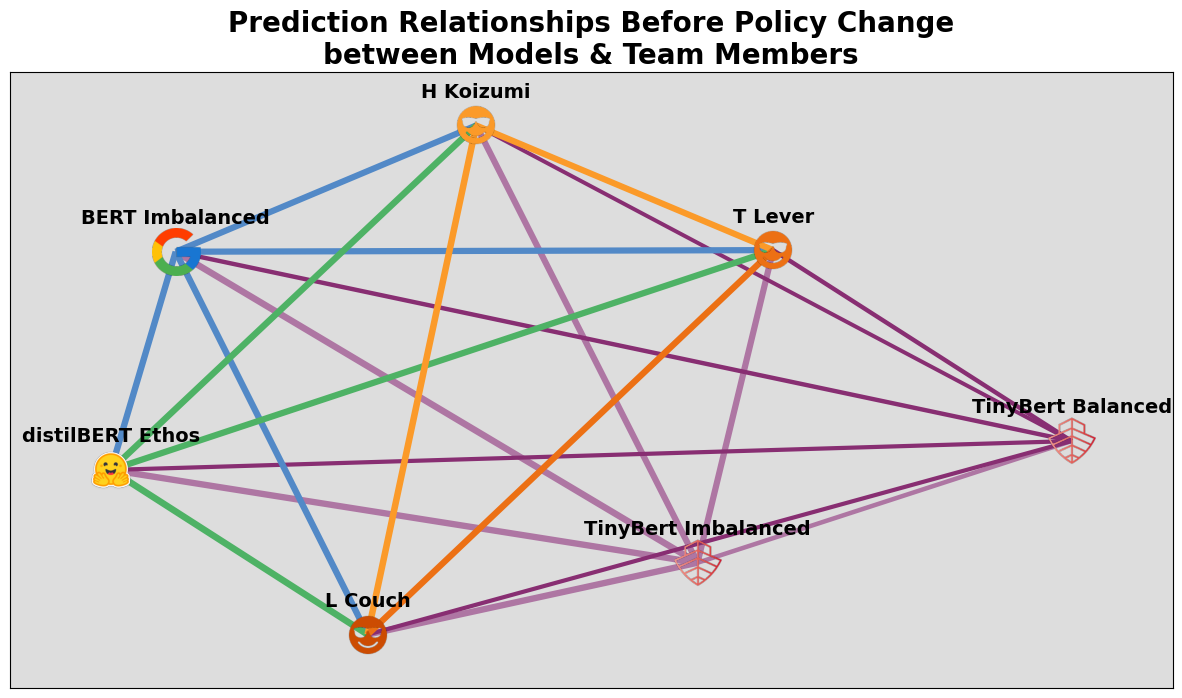

In [89]:
# Exclude the 'body' and 'subreddit' columns from matrix
model_columns = [col for col in consistency_matrix.columns if col not in ['body', 'subreddit']]
filtered_matrix = consistency_matrix.loc[model_columns, model_columns]

#https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html
icons = {
    'TinyBert Imbalanced': 'Huawei.png',   
    'TinyBert Balanced': 'Huawei.png',
    'BERT Imbalanced': 'google_icon.png',
    'distilBERT Ethos': 'hf-logo.png',
    'H Koizumi': 'HK.png',
    'T Lever': 'tl.png',
    'L Couch': 'lc.png',   
    
}

# Load images
images = {k: Image.open(fname) for k, fname in icons.items()}

color_map = {
    'TinyBert Imbalanced': '#ae76a3',   
    'TinyBert Balanced': '#882e72',    
    'BERT Imbalanced': '#5289c7',
    'distilBERT Ethos': '#4eb265',
    'H Koizumi': '#fb9a29',
    'T Lever': '#ec7014',
    'L Couch': '#cc4c02',   
}


G = nx.Graph()

# Add nodes and edges with weights
for i, model1 in enumerate(filtered_matrix.columns):
    for j, model2 in enumerate(filtered_matrix.columns):
        if i < j:
            weight = filtered_matrix.loc[model1, model2]
            if weight > 0.5:  # Thresholding to only show stronger agreements
                G.add_edge(model1, model2, weight=weight)


for node in G.nodes():
    G.nodes[node]['image'] = images[node]
    
plt.figure(figsize=(15,8)) #facecolor = 'lightblue'
plt.title('Prediction Relationships Before Policy Change\nbetween Models & Team Members', 
          fontsize=20, fontweight='bold')

pos = nx.spring_layout(G, seed = 44)  

# Offset for labels 
label_offset_y = -0.1  

# Modified label positions
label_pos = {node: (pos[node][0], pos[node][1] - label_offset_y) for node in G.nodes()}

# Draw the network without nodes 
edge_weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
normalized_weights = (weights - min(weights)) / (max(weights) - min(weights))
enhanced_weights = normalized_weights *2

edge_colors = [color_map[u] for u, v in G.edges()] 

# Transform coordinates for placing images)
ax = plt.gca()
ax.set_facecolor('#DDDDDD') 
fig = plt.gcf()
trans = ax.transData.transform
trans_fig = fig.transFigure.inverted().transform

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=enhanced_weights, ax=ax)
nx.draw_networkx_labels(G, label_pos, font_size=14, font_weight = 'bold', ax=ax)

# image size
size = 0.06  

# Draw images last so that they are on top, with a higher zorder to ensure visibility
for node in G.nodes():
    image = G.nodes[node]['image']
    (x, y) = pos[node]
    xx, yy = trans((x, y))  # data to display coordinates
    xa, ya = trans_fig((xx, yy))  # display to figure coordinates
    a = plt.axes([xa - size/2.0, ya - size/2.0, size, size], zorder=3)
    a.imshow(image)
    a.set_aspect('equal')
    a.axis('off')
    
# edge colors     
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights * 5, edge_color=edge_colors, ax=ax)

# Display graph
plt.axis('off') 
plt.savefig('network_before.png')
plt.show()

### Qualitative Viz After

In [92]:
file_path = 'Reddit Qualitative Analysis Coding_After.csv'
after_sample_one_500 = pd.read_csv(file_path)

In [94]:
len(after_sample_one_500)

491

In [96]:
after_sample_one_500.head(1)

,body,tinyB_imbal_pred,tinyB_bal_pred,BERT_pred,distilB_pred,HK Blind Label,Lorinda,Tom,subreddit,subreddit_id,created_utc,parent_id,subreddit_type,merge_tl,merge_hk
0,lunik war eine tolle band,0,1,1,0,0,0,0,de,t5_22i0,7/2/2020 11:04,t3_hjrzjq,public,both,both


In [98]:
# Rename columns for clarity
after_sample_one_500 = after_sample_one_500.rename(columns={'tinyB_imbal_pred':'TinyBert Imbalanced', 'tinyB_bal_pred': 'TinyBert Balanced', 
                                        'BERT_pred': 'BERT Imbalanced', 'distilB_pred':'distilBERT Ethos', 'HK Blind Label':'H Koizumi', 'Tom': 'T Lever', 'Lorinda': 'L Couch'})
after_sample_one_matrix = after_sample_one_500.drop(columns={'subreddit_id','created_utc', 'parent_id', 'subreddit_type','merge_tl','merge_hk'})
after_sample_one_matrix['L Couch'] = after_sample_one_matrix['L Couch'].astype(int)
after_sample_one_matrix.head(1)

,body,TinyBert Imbalanced,TinyBert Balanced,BERT Imbalanced,distilBERT Ethos,H Koizumi,L Couch,T Lever,subreddit
0,lunik war eine tolle band,0,1,1,0,0,0,0,de


In [100]:
# Function to calculate pairwise agreement between columns
def pairwise_agreement(df):
    columns = df.columns
    agreement_df = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            agreement_df.loc[col1, col2] = (df[col1] == df[col2]).mean()
            
    return agreement_df

# Calculate pairwise agreement
consistency_matrix_after = pairwise_agreement(after_sample_one_matrix.dropna())
consistency_matrix_after

,body,TinyBert Imbalanced,TinyBert Balanced,BERT Imbalanced,distilBERT Ethos,H Koizumi,L Couch,T Lever,subreddit
body,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TinyBert Imbalanced,0.0,1.0,0.604888,0.95723,0.930754,0.95723,0.934827,0.928717,0.0
TinyBert Balanced,0.0,0.604888,1.0,0.606925,0.584521,0.570265,0.596741,0.570265,0.0
BERT Imbalanced,0.0,0.95723,0.606925,1.0,0.93279,0.955193,0.94501,0.934827,0.0
distilBERT Ethos,0.0,0.930754,0.584521,0.93279,1.0,0.965377,0.942974,0.928717,0.0
H Koizumi,0.0,0.95723,0.570265,0.955193,0.965377,1.0,0.953157,0.959267,0.0
L Couch,0.0,0.934827,0.596741,0.94501,0.942974,0.953157,1.0,0.936864,0.0
T Lever,0.0,0.928717,0.570265,0.934827,0.928717,0.959267,0.936864,1.0,0.0
subreddit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


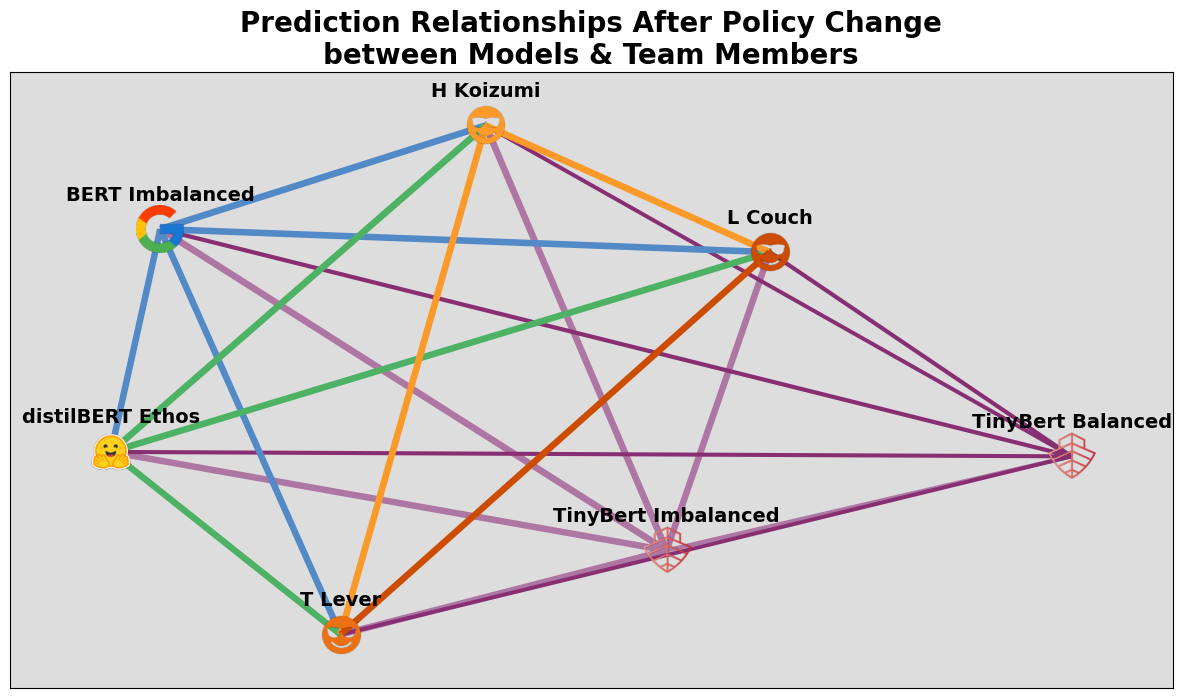

In [102]:
# Exclude the 'body' and 'subreddit' columns from matrix
model_columns = [col for col in consistency_matrix_after.columns if col not in ['body', 'subreddit']]
filtered_matrix = consistency_matrix_after.loc[model_columns, model_columns]

#https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html
icons = {
    'TinyBert Imbalanced': 'Huawei.png',   
    'TinyBert Balanced': 'Huawei.png',
    'BERT Imbalanced': 'google_icon.png',
    'distilBERT Ethos': 'hf-logo.png',
    'H Koizumi': 'HK.png',
    'T Lever': 'tl.png',
    'L Couch': 'lc.png',   
    
}

# Load images
images = {k: Image.open(fname) for k, fname in icons.items()}

color_map = {
    'TinyBert Imbalanced': '#ae76a3',   
    'TinyBert Balanced': '#882e72',    
    'BERT Imbalanced': '#5289c7',
    'distilBERT Ethos': '#4eb265',
    'H Koizumi': '#fb9a29',
    'T Lever': '#ec7014',
    'L Couch': '#cc4c02',   
}


G = nx.Graph()

# Add nodes and edges with weights
for i, model1 in enumerate(filtered_matrix.columns):
    for j, model2 in enumerate(filtered_matrix.columns):
        if i < j:
            weight = filtered_matrix.loc[model1, model2]
            if weight > 0.5:  # Thresholding to only show stronger agreements
                G.add_edge(model1, model2, weight=weight)


for node in G.nodes():
    G.nodes[node]['image'] = images[node]
    
plt.figure(figsize=(15,8)) #facecolor = 'lightblue'
plt.title('Prediction Relationships After Policy Change\nbetween Models & Team Members', 
          fontsize=20, fontweight='bold')

pos = nx.spring_layout(G, seed = 44)  

# Offset for labels 
label_offset_y = -0.1  

# Modified label positions
label_pos = {node: (pos[node][0], pos[node][1] - label_offset_y) for node in G.nodes()}

# Draw network without nodes 
edge_weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
normalized_weights = (weights - min(weights)) / (max(weights) - min(weights))
enhanced_weights = normalized_weights *2

edge_colors = [color_map[u] for u, v in G.edges()]  # Use the color_map for edge colors

# Transform coordinates for placing images)
ax = plt.gca()
ax.set_facecolor('#DDDDDD') 
fig = plt.gcf()
trans = ax.transData.transform
trans_fig = fig.transFigure.inverted().transform

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=enhanced_weights, ax=ax)
nx.draw_networkx_labels(G, label_pos, font_size=14, font_weight = 'bold', ax=ax)

# image size
size = 0.06  

# Draw images last so that they are on top, with a higher zorder to ensure visibility
for node in G.nodes():
    image = G.nodes[node]['image']
    (x, y) = pos[node]
    xx, yy = trans((x, y))  # data to display coordinates
    xa, ya = trans_fig((xx, yy))  # display to figure coordinates
    a = plt.axes([xa - size/2.0, ya - size/2.0, size, size], zorder=3)
    a.imshow(image)
    a.set_aspect('equal')
    a.axis('off')
    
# edge colors     
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights * 5, edge_color=edge_colors, ax=ax)

# Display graph
plt.axis('off') 
plt.savefig('network_before.png')
plt.show()

### Agreement Between Models/Team Members Viz

In [174]:
# Create list of model prediction columns
model_columns = ['TinyBert Imbalanced', 'TinyBert Balanced', 'BERT Imbalanced', 'distilBERT Ethos', 'H Koizumi', 'T Lever', 'L Couch']

# Sum predictions across model columns for each row
all_sample['sum_predictions'] = all_sample[model_columns].sum(axis=1)

# Count frequency of each sum 
agreement_counts = all_sample['sum_predictions'].value_counts().sort_index()

# Convert Series to DataFrame 
agreement_counts_df = agreement_counts.reset_index()
agreement_counts_df.columns = ['Number of Models Agreeing', 'Count']

# Display results
agreement_counts_df

,Number of Models Agreeing,Count
0,0,521
1,1,339
2,2,76
3,3,23
4,4,22
5,5,9
6,6,1


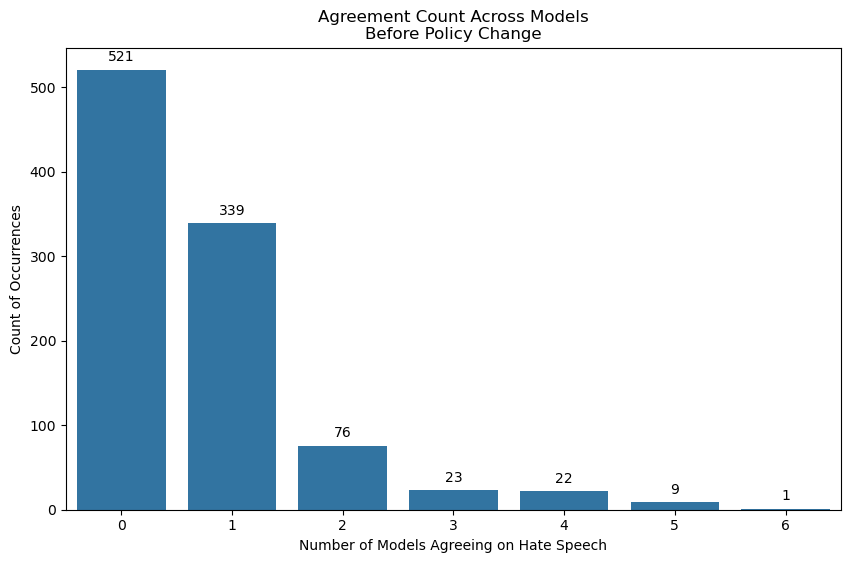

In [106]:
# Plotting bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Number of Models Agreeing', y='Count', data=agreement_counts_df)

# Add labels and title 
plt.xlabel('Number of Models Agreeing on Hate Speech')
plt.ylabel('Count of Occurrences')
plt.title('Agreement Count Across Models\nBefore Policy Change')

# Add count above the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format count as a whole number
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for annotation
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # The distance from top of bar to annotation
                     textcoords = 'offset points')


# Show plot
plt.show()

In [108]:
# Save to csv
before_sample_one_matrix.to_csv('before_sample_one_matrix.csv', index=False)

In [114]:
# Save to csv
after_sample_one_matrix.to_csv('after_sample_one_matrix.csv', index=False)

In [156]:
# Read both CSV files
before_sample_one_matrix = pd.read_csv('before_sample_one_matrix.csv')
after_sample_one_matrix = pd.read_csv('after_sample_one_matrix.csv')

# Concatenate DataFrames
all_sample_matrix= pd.concat([before_sample_one_matrix, after_sample_one_matrix], ignore_index=True)

In [158]:
# Define model names
model_names = ['TinyBert Imbalanced', 'TinyBert Balanced', 'BERT Imbalanced', 'distilBERT Ethos', 'H Koizumi', 'T Lever', 'L Couch']

# Concatenate model names where the value is 1 into single string
all_sample_matrix['agreement_pattern'] = all_sample_matrix[model_names].apply(
    lambda row: ', '.join(model for model, value in zip(model_names, row) if value == 1),
    axis=1
)

# Display DataFrame 
all_sample_matrix

,body,TinyBert Imbalanced,TinyBert Balanced,BERT Imbalanced,distilBERT Ethos,H Koizumi,T Lever,L Couch,subreddit,agreement_pattern
0,0000 0047,0,0,0,0,0,0,0,pokemontrades,
1,11aside allweather footballhockey pitch fiveas...,0,0,0,0,0,0,0,PictureGame,
2,20x larger 3840x1920 version of linked image h...,0,0,0,0,0,0,0,ImaginaryBeingDerps,
3,48 and 40 eu shoe size age idk 195cm and 170cm,0,1,0,0,0,0,0,tall,TinyBert Balanced
4,5 stars for your balls,1,1,1,0,0,0,0,Balls,"TinyBert Imbalanced, TinyBert Balanced, BERT I..."
...,...,...,...,...,...,...,...,...,...,...
986,oh i see honestly it was not that bad just ver...,0,0,0,0,0,0,0,eroticauthors,
987,living the memes,0,0,0,0,0,0,0,AskReddit,
988,did he even do anything interesting on jojos s...,0,0,0,0,0,0,0,thebachelor,
989,sweet deal keep us updated do you mind if i as...,0,0,0,0,0,0,0,Datsun,


In [160]:
# Define model names
model_names = ['TinyBert Imbalanced', 'TinyBert Balanced', 'BERT Imbalanced', 'distilBERT Ethos', 'H Koizumi', 'T Lever', 'L Couch']

# Create empty DataFrame with columns for each model
binary_df = pd.DataFrame(columns=model_names)

# Iterate through agreement patterns and populate binary DataFrame
for pattern in all_sample_matrix['agreement_pattern']:
    binary_row = []
    for model in model_names:
        binary_row.append(1 if model in pattern.split(', ') else 0)
    binary_df.loc[len(binary_df)] = binary_row

In [162]:
# sum values in each column to get count of agreements for each model
pattern_counts = binary_df.sum()
# convert to DataFrame 
pattern_counts_df = pattern_counts.reset_index()
pattern_counts_df.columns = ['Model', 'Count']

C:\Users\Rhonda\AppData\Local\Temp\ipykernel_9424\1594443211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Count', data=pattern_counts_df, palette="viridis")


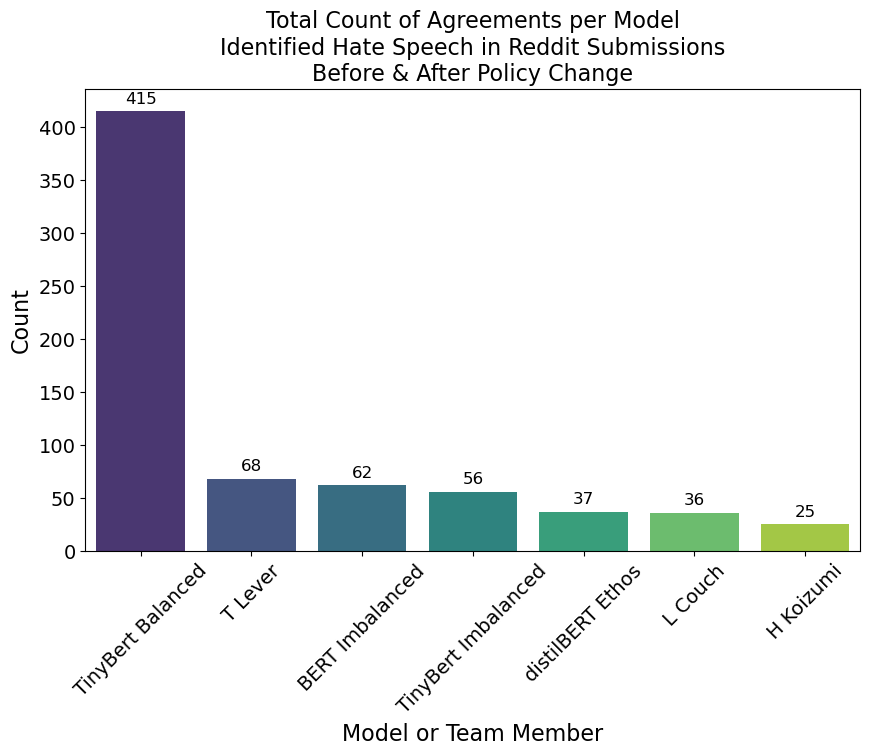

In [170]:
# Sort DataFrame based on 'Count' in descending order
pattern_counts_df = pattern_counts_df.sort_values('Count', ascending=False)

# create barplot 
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Count', data=pattern_counts_df, palette="viridis")

# Add labels and title plt.ylabel('Count', fontsize = 16)
plt.xlabel('Model or Team Member',fontsize = 16)
plt.title('Total Count of Agreements per Model\nIdentified Hate Speech in Reddit Submissions\nBefore & After Policy Change', fontsize = 16)

# Add count above  bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points', fontsize =12)

plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=14)

# Save and show plot
plt.savefig('bar_model_agree.png')
plt.show()

In [166]:
# Initialize DataFrame to store co-occurrence counts
co_occurrence_matrix = pd.DataFrame(np.zeros((len(model_names), len(model_names))), index=model_names, columns=model_names)

# Calculate co-occurrence for each pair of models
for i, model1 in enumerate(model_names):
    for j, model2 in enumerate(model_names):
        co_occurrence_matrix.loc[model1, model2] = np.sum(binary_df[model1] & binary_df[model2])

#set the diagonal to NaN for visualization purposes
np.fill_diagonal(co_occurrence_matrix.values, np.nan)

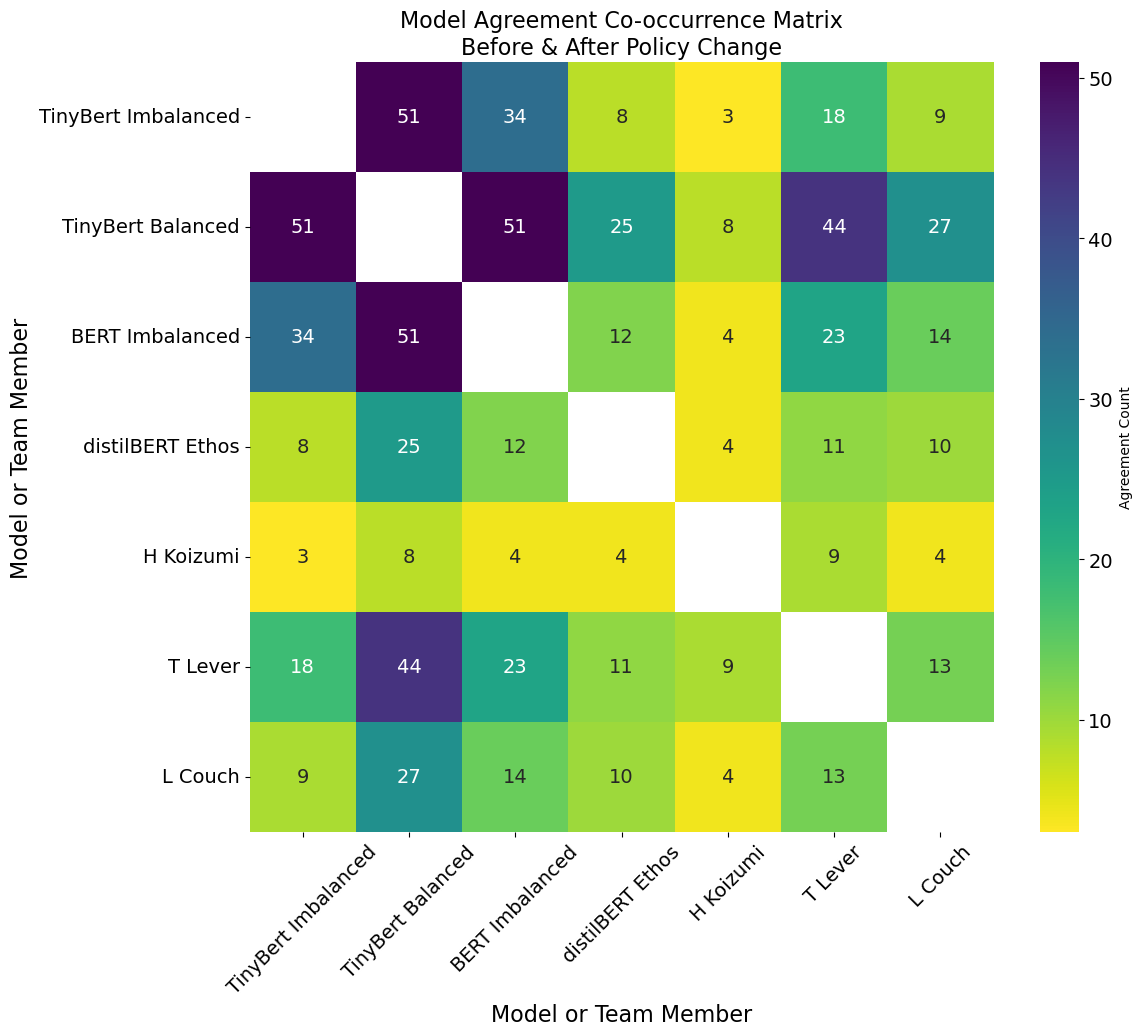

In [172]:
plt.figure(figsize=(12, 10))

# Assign AxesSubplot object returned by sns.heatmap() to variable 'ax'
ax = sns.heatmap(co_occurrence_matrix, annot=True, fmt='g', cmap='viridis_r',
                 cbar_kws={'label': 'Agreement Count'},
                annot_kws={'size':14})

plt.title('Model Agreement Co-occurrence Matrix\nBefore & After Policy Change', fontsize=16)
plt.xlabel('Model or Team Member', fontsize=16)
plt.ylabel('Model or Team Member', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.savefig('heat_before.png')
plt.show()